In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder , StandardScaler


#Link Github : https://github.com/BChristoper/Week-6-Data-Mining

In [21]:
df = pd.read_csv(r"https://raw.githubusercontent.com/BChristoper/Week-6-Data-Mining/refs/heads/main/breast-cancer.csv")

df.head()

#Memanggil csv dari web

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
df.info()

#mendapatkan info mengenai column dan ada berapa banyak data
#disini kita dapat melihat kalau terdapat 9 kolum yaitu Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome dengan jumlah 768 data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
checknull = df.isnull().sum()

checknull

#check ada yang null atau tidak

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [24]:
# Basic statistical summary of the dataset
describe = df.describe()

# Display the summary statistics
describe

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# EDA

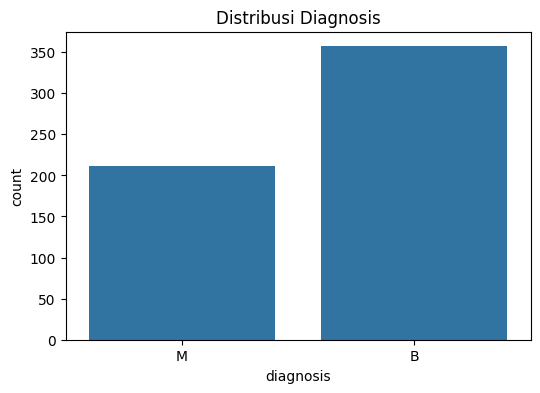

In [25]:

# Visualisasi distribusi diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribusi Diagnosis')
plt.show()


# Split testing 

In [28]:
# Memisahkan fitur dan label
X = df.drop(['diagnosis'], axis=1)  # Menghapus kolom 'id' dan 'diagnosis'
y = df['diagnosis']

# Standarisasi data fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Performa Decision Tree (Gini):
Akurasi: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        71
           M       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



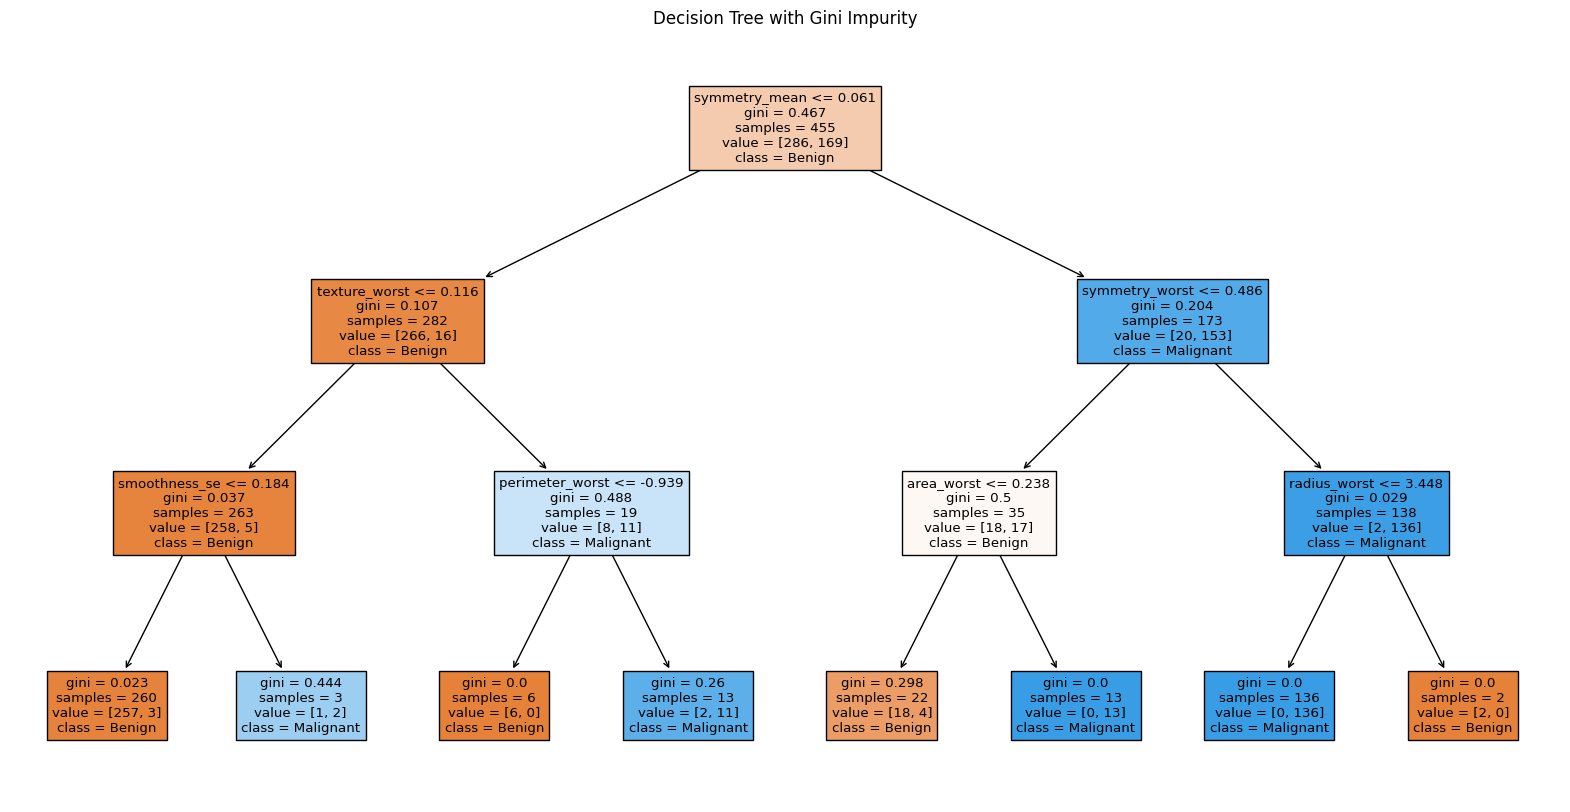

In [31]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Decision Tree dengan Gini Impurity
# Menginisialisasi model Decision Tree dengan Gini
dt_gini = DecisionTreeClassifier(criterion='gini',max_depth= 3, random_state=42)
dt_gini.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred_gini = dt_gini.predict(X_test)

# Evaluasi performa model dengan Gini
print("Performa Decision Tree (Gini):")
print("Akurasi:", accuracy_score(y_test, y_pred_gini))
print("Classification Report:\n", classification_report(y_test, y_pred_gini))

# Visualisasi pohon keputusan Gini
plt.figure(figsize=(20,10))
plot_tree(dt_gini, filled=True, feature_names=df.columns[2:], class_names=['Benign', 'Malignant'])
plt.title("Decision Tree with Gini Impurity")
plt.show()




Performa Decision Tree (Entropy):
Akurasi: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           B       0.95      1.00      0.97        71
           M       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



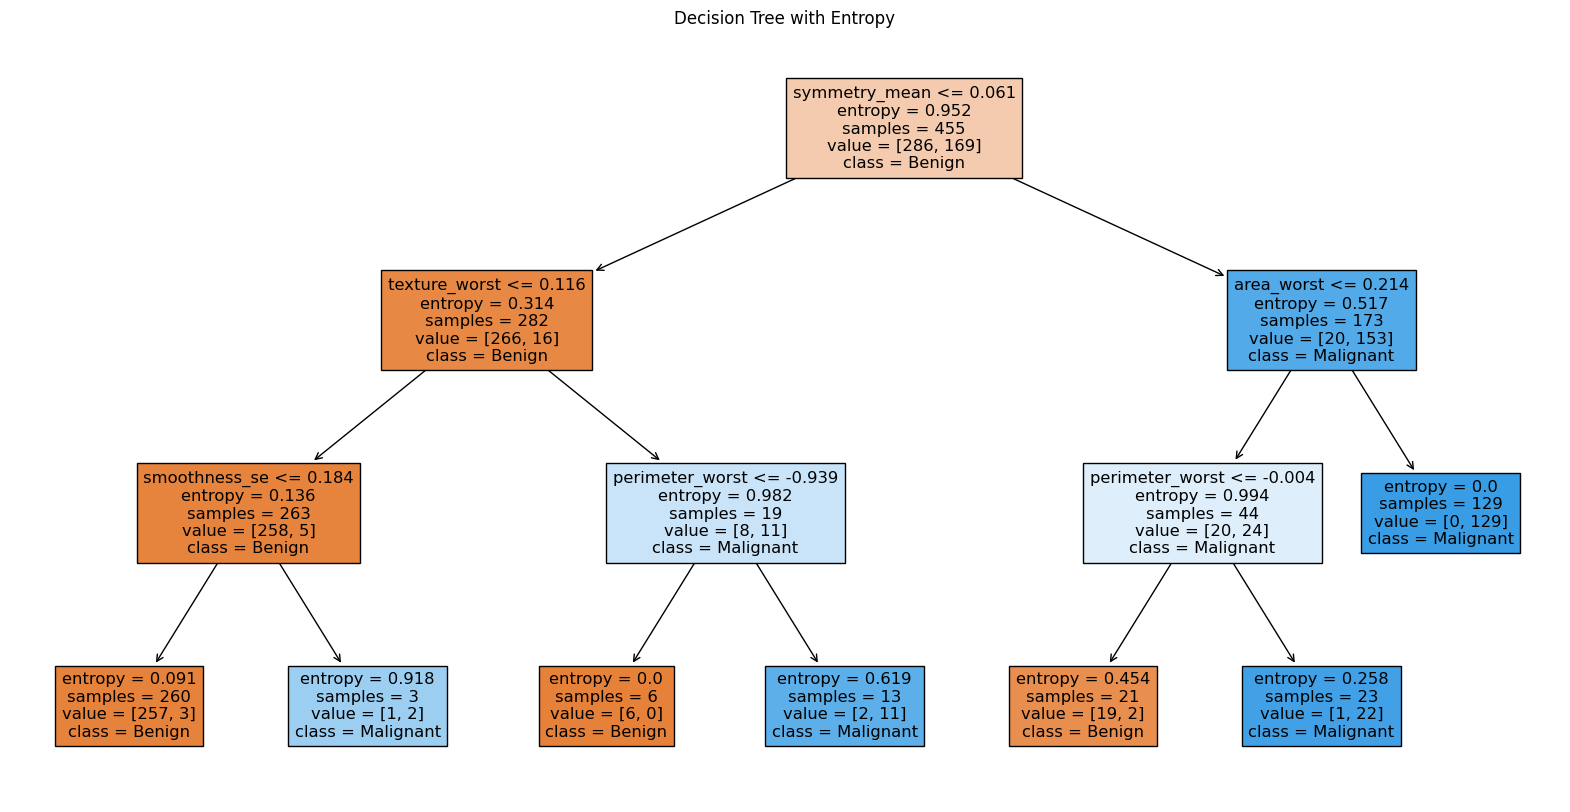

In [32]:
# 2. Decision Tree dengan Entropy
# Menginisialisasi model Decision Tree dengan Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth= 3, random_state=42)
dt_entropy.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred_entropy = dt_entropy.predict(X_test)

# Evaluasi performa model dengan Entropy
print("\nPerforma Decision Tree (Entropy):")
print("Akurasi:", accuracy_score(y_test, y_pred_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))

# Visualisasi pohon keputusan Entropy
plt.figure(figsize=(20,10))
plot_tree(dt_entropy, filled=True, feature_names=df.columns[2:], class_names=['Benign', 'Malignant'])
plt.title("Decision Tree with Entropy")
plt.show()

In [36]:
# 3. K-Nearest Neighbors (KNN)
# Menginisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Membuat prediksi pada data uji menggunakan KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluasi performa model KNN
print("\nPerforma K-Nearest Neighbors (KNN):")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Performa K-Nearest Neighbors (KNN):
Akurasi: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [37]:
# 4. Random Forest
# Menginisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Membuat prediksi pada data uji menggunakan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi performa model Random Forest
print("\nPerforma Random Forest:")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Performa Random Forest:
Akurasi: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Jadi hasil yang paling memuaskan adalah Decision Tree dengan memakai cara entropy yaitu 0.9649